# kaggle房价预测

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

数据字段:

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 1.初步数据分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

加载数据，并初步查看数据，可见数据完整，没有缺失和重复现象。

In [2]:
raw_data = pd.read_csv('kc_house_data.csv')
raw_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
raw_data.duplicated().sum()

0

## 2.划分训练集和验证集，并标准化

In [5]:
X = raw_data.drop(['id', 'date', 'price'], axis=1)
y = raw_data['price']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1026)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

## 3.初步建立模型

选择K近邻回归、决策树回归、随机森林回归和梯度提升树回归等多个模型进行初步实验

In [11]:
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
time_start=time.time()
model.fit(X_train, y_train)
print('K近邻回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('K近邻回归模型在验证集上的平均绝对误差和均方误差分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

K近邻回归模型训练用时： 0.0009999275207519531
K近邻回归模型在验证集上的平均绝对误差和均方误差分别为： 91050.29353793953 32515986743.98718


In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
time_start=time.time()
model.fit(X_train, y_train)
print('决策树回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('决策树回归模型在验证集上的平均绝对误差和均方误差分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

决策树回归模型训练用时： 0.2630152702331543
决策树回归模型在验证集上的平均绝对误差和均方误差分别为： 100152.68676742751 31997570449.77722


In [11]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators=500)
time_start=time.time()
model.fit(X_train, y_train)
print('随机森林回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('随机森林回归模型在验证集上的平均绝对误差和均方误差分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

随机森林回归模型训练用时： 74.17524242401123
随机森林回归模型在验证集上的平均绝对误差和均方误差分别为： 70386.73556989133 17226271223.34567


In [12]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=500)
time_start=time.time()
model.fit(X_train, y_train)
print('梯度提升树回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('梯度提升树回归模型在验证集上的平均绝对误差和均方误差分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

梯度提升树回归模型训练用时： 20.325162649154663
梯度提升树回归模型在验证集上的平均绝对误差和均方误差分别为： 69337.36265772126 14918263207.571117


## 4.超参数调优

对用时最少、得分最高的梯度提升树回归模型进行超参数调优。具体采用网格搜索方法。

In [13]:
from sklearn.model_selection import GridSearchCV

model_slect = GradientBoostingRegressor()
parameters = {'loss': ['ls','lad','huber','quantile'], 'learning_rate':[0.1, 0.2], 'min_samples_leaf': [1,2,3,4]}
time_start=time.time()
model_gs = GridSearchCV(estimator=model_slect, param_grid=parameters, verbose=3)
model_gs.fit(X,y)
print('网络搜索用时：', time.time()-time_start)
print('最高得分:', model_gs.best_score_)
print('最好参数:', model_gs.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, loss=ls, min_samples_leaf=1;, score=0.876 total time=   4.6s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, loss=ls, min_samples_leaf=1;, score=0.868 total time=   4.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, loss=ls, min_samples_leaf=1;, score=0.861 total time=   4.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, loss=ls, min_samples_leaf=1;, score=0.852 total time=   4.6s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, loss=ls, min_samples_leaf=1;, score=0.860 total time=   4.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, loss=ls, min_samples_leaf=2;, score=0.878 total time=   4.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, loss=ls, min_samples_leaf=2;, score=0.869 total time=   4.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, loss=ls, min_samples_leaf=2;, score=0.863 total time=   4.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, loss=ls, min_samples_leaf=2;, score=0.848 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, loss=ls, min_samples_leaf=2;, score=0.862 total time=   4.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, loss=ls, min_samples_leaf=3;, score=0.879 total time=   4.6s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, loss=ls, min_samples_leaf=3;, score=0.867 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, loss=ls, min_samples_leaf=3;, score=0.864 total time=   4.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, loss=ls, min_samples_leaf=3;, score=0.854 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, loss=ls, min_samples_leaf=3;, score=0.862 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, loss=ls, min_samples_leaf=4;, score=0.882 total time=   4.6s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, loss=ls, min_samples_leaf=4;, score=0.865 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, loss=ls, min_samples_leaf=4;, score=0.867 total time=   4.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, loss=ls, min_samples_leaf=4;, score=0.853 total time=   4.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, loss=ls, min_samples_leaf=4;, score=0.862 total time=   4.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, loss=lad, min_samples_leaf=1;, score=0.787 total time=   5.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, loss=lad, min_samples_leaf=1;, score=0.776 total time=   5.0s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, loss=lad, min_samples_leaf=1;, score=0.797 total time=   5.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, loss=lad, min_samples_leaf=1;, score=0.829 total time=   5.0s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, loss=lad, min_samples_leaf=1;, score=0.815 total time=   5.0s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, loss=lad, min_samples_leaf=2;, score=0.797 total time=   5.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, loss=lad, min_samples_leaf=2;, score=0.776 total time=   5.6s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, loss=lad, min_samples_leaf=2;, score=0.802 total time=   5.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, loss=lad, min_samples_leaf=2;, score=0.823 total time=   5.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, loss=lad, min_samples_leaf=2;, score=0.802 total time=   5.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, loss=lad, min_samples_leaf=3;, score=0.796 total time=   7.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, loss=lad, min_samples_leaf=3;, score=0.770 total time=   5.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, loss=lad, min_samples_leaf=3;, score=0.802 total time=   5.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, loss=lad, min_samples_leaf=3;, score=0.831 total time=   5.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, loss=lad, min_samples_leaf=3;, score=0.801 total time=   5.7s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.1, loss=lad, min_samples_leaf=4;, score=0.796 total time=   5.7s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.1, loss=lad, min_samples_leaf=4;, score=0.768 total time=   5.8s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.1, loss=lad, min_samples_leaf=4;, score=0.799 total time=   5.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.1, loss=lad, min_samples_leaf=4;, score=0.821 total time=   7.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.1, loss=lad, min_samples_leaf=4;, score=0.802 total time=   5.2s
[CV 1/5] END learning_rate=0.1, loss=huber, min_samples_leaf=1;, score=0.841 total time=   5.7s
[CV 2/5] END learning_rate=0.1, loss=huber, min_samples_leaf=1;, score=0.829 total time=   5.8s
[CV 3/5] END learning_rate=0.1, loss=huber, min_samples_leaf=1;, score=0.844 total time=   5.6s
[CV 4/5] END learning_rate=0.1, loss=huber, min_samples_leaf=1;, score=0.855 total time=   5.7s
[CV 5/5] END learning_rate=0.1, loss=huber, min_samples_leaf=1;, score=0.849 total time=   6.0s
[CV 1/5] END learning_rate=0.1, loss=huber, min_samples_leaf=2;, score=0.843 total time=   5.2s
[CV 2/5] END learning_rate=0.1, loss=huber, min_samples_leaf=2;, score=0.832 total time=   5.2s
[CV 3/5] END learning_rate=0.1, loss=huber, min_samples_leaf=2;, score=0.841 total time=   5.1s
[CV 4/5] END learning_rate=0.1, loss=huber, min_samples_leaf=2;, score=0.852 total time=   5.3s
[CV 5/5] END learning_rate=0.1, loss=huber

e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.2, loss=ls, min_samples_leaf=1;, score=0.889 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.2, loss=ls, min_samples_leaf=1;, score=0.875 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.2, loss=ls, min_samples_leaf=1;, score=0.870 total time=   4.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.2, loss=ls, min_samples_leaf=1;, score=0.866 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.2, loss=ls, min_samples_leaf=1;, score=0.869 total time=   4.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.2, loss=ls, min_samples_leaf=2;, score=0.883 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.2, loss=ls, min_samples_leaf=2;, score=0.877 total time=   4.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.2, loss=ls, min_samples_leaf=2;, score=0.869 total time=   4.4s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.2, loss=ls, min_samples_leaf=2;, score=0.868 total time=   4.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.2, loss=ls, min_samples_leaf=2;, score=0.872 total time=   4.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.2, loss=ls, min_samples_leaf=3;, score=0.892 total time=   4.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.2, loss=ls, min_samples_leaf=3;, score=0.882 total time=   4.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.2, loss=ls, min_samples_leaf=3;, score=0.873 total time=   4.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.2, loss=ls, min_samples_leaf=3;, score=0.870 total time=   4.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.2, loss=ls, min_samples_leaf=3;, score=0.869 total time=   4.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.2, loss=ls, min_samples_leaf=4;, score=0.893 total time=   4.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.2, loss=ls, min_samples_leaf=4;, score=0.882 total time=   4.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.2, loss=ls, min_samples_leaf=4;, score=0.873 total time=   4.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.2, loss=ls, min_samples_leaf=4;, score=0.867 total time=   4.9s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.2, loss=ls, min_samples_leaf=4;, score=0.868 total time=   4.3s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.2, loss=lad, min_samples_leaf=1;, score=0.846 total time=   4.8s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.2, loss=lad, min_samples_leaf=1;, score=0.823 total time=   4.8s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.2, loss=lad, min_samples_leaf=1;, score=0.847 total time=   4.8s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.2, loss=lad, min_samples_leaf=1;, score=0.854 total time=   4.9s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.2, loss=lad, min_samples_leaf=1;, score=0.850 total time=   4.8s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.2, loss=lad, min_samples_leaf=2;, score=0.844 total time=   4.9s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.2, loss=lad, min_samples_leaf=2;, score=0.823 total time=   4.8s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.2, loss=lad, min_samples_leaf=2;, score=0.843 total time=   4.8s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.2, loss=lad, min_samples_leaf=2;, score=0.839 total time=   4.9s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.2, loss=lad, min_samples_leaf=2;, score=0.849 total time=   5.0s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.2, loss=lad, min_samples_leaf=3;, score=0.847 total time=   5.0s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.2, loss=lad, min_samples_leaf=3;, score=0.825 total time=   5.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.2, loss=lad, min_samples_leaf=3;, score=0.843 total time=   5.1s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.2, loss=lad, min_samples_leaf=3;, score=0.853 total time=   5.2s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.2, loss=lad, min_samples_leaf=3;, score=0.850 total time=   5.5s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 1/5] END learning_rate=0.2, loss=lad, min_samples_leaf=4;, score=0.852 total time=   5.0s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 2/5] END learning_rate=0.2, loss=lad, min_samples_leaf=4;, score=0.835 total time=   5.9s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 3/5] END learning_rate=0.2, loss=lad, min_samples_leaf=4;, score=0.839 total time=   4.9s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 4/5] END learning_rate=0.2, loss=lad, min_samples_leaf=4;, score=0.849 total time=   4.8s


e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


[CV 5/5] END learning_rate=0.2, loss=lad, min_samples_leaf=4;, score=0.851 total time=   4.8s
[CV 1/5] END learning_rate=0.2, loss=huber, min_samples_leaf=1;, score=0.882 total time=   5.2s
[CV 2/5] END learning_rate=0.2, loss=huber, min_samples_leaf=1;, score=0.864 total time=   5.3s
[CV 3/5] END learning_rate=0.2, loss=huber, min_samples_leaf=1;, score=0.874 total time=   5.3s
[CV 4/5] END learning_rate=0.2, loss=huber, min_samples_leaf=1;, score=0.875 total time=   5.4s
[CV 5/5] END learning_rate=0.2, loss=huber, min_samples_leaf=1;, score=0.862 total time=   5.2s
[CV 1/5] END learning_rate=0.2, loss=huber, min_samples_leaf=2;, score=0.886 total time=   5.4s
[CV 2/5] END learning_rate=0.2, loss=huber, min_samples_leaf=2;, score=0.859 total time=   5.2s
[CV 3/5] END learning_rate=0.2, loss=huber, min_samples_leaf=2;, score=0.871 total time=   5.4s
[CV 4/5] END learning_rate=0.2, loss=huber, min_samples_leaf=2;, score=0.859 total time=   5.9s
[CV 5/5] END learning_rate=0.2, loss=huber

e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


网络搜索用时： 855.0799074172974
最高得分: 0.8773312036638693
最好参数: {'learning_rate': 0.2, 'loss': 'ls', 'min_samples_leaf': 3}


In [14]:
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2,loss='ls',min_samples_leaf=4)
time_start=time.time()
model.fit(X_train, y_train)
print('调优后梯度提升树回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('调优后梯度提升树回归模型在验证集上的平均绝对误差和均方误差分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


调优后梯度提升树回归模型训练用时： 22.17326807975769
调优后梯度提升树回归模型在验证集上的平均绝对误差和均方误差分别为： 67732.88671176456 14428257309.484697


## 5.特征选择

用相关系数来观察不同特征之间以及它们和标签值之间的相关性

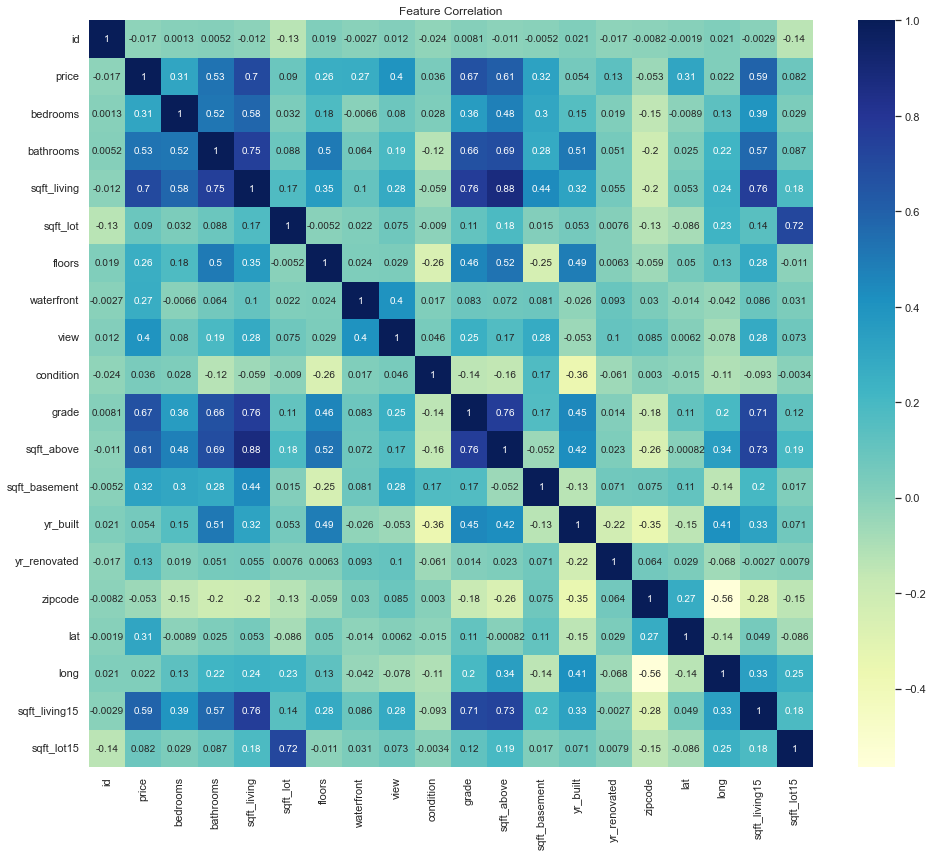

In [15]:
plt.figure(figsize=(14,12))
sns.heatmap(raw_data.corr(), annot=True, cmap="YlGnBu")
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()

去掉与标签相关系数值较小的特征，重新训练模型，比较结果，发现得分略降低，但用时大幅下降

In [16]:
X1 = X.drop(['sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15'], axis=1)
#X1 = X.drop(['zipcode'], axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1026)
sc.fit(X1_train)
X1_train= sc.transform(X1_train)
X1_test = sc.transform(X1_test)

In [17]:
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2,loss='ls',min_samples_leaf=4)
time_start=time.time()
model.fit(X1_train, y_train)
print('梯度提升树回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X1_test)
print ('梯度提升树回归模型在验证集上的平均绝对误差和均方误差分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


梯度提升树回归模型训练用时： 11.41065263748169
梯度提升树回归模型在验证集上的平均绝对误差和均方误差分别为： 90950.93045229265 25975665081.190945


用散点图观察特征与标签的相关性

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

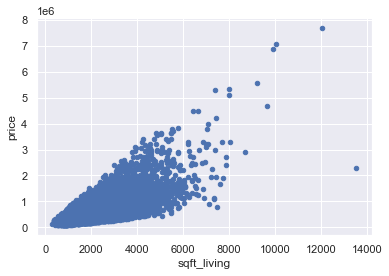

In [18]:
raw_data.plot(kind='scatter', x='sqft_living', y='price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='zipcode', ylabel='price'>

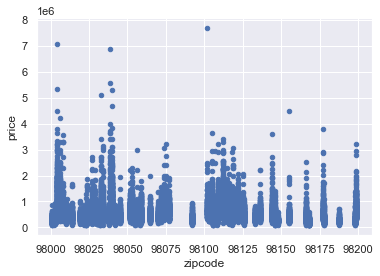

In [19]:
raw_data.plot(kind='scatter', x='zipcode', y='price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='grade', ylabel='price'>

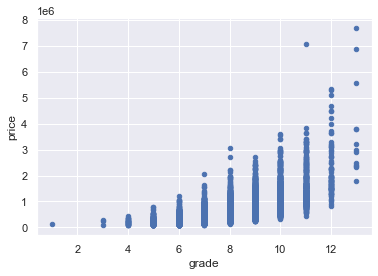

In [20]:
raw_data.plot(kind='scatter', x='grade', y='price')

依次去掉一个特征，进行模型训练，观察模型得分

In [21]:
columns = (X.columns).tolist()

In [22]:
for column in columns:
    X1 = X.drop([column], axis=1)
    #print(X1.columns)
    X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1026)
    sc.fit(X1_train)
    X1_train= sc.transform(X1_train)
    X1_test = sc.transform(X1_test)
    time_start=time.time()
    model.fit(X1_train, y_train)
    print('去掉', column, '特征后的训练用时：', time.time()-time_start)
    y_pred=model.predict(X1_test)
    print ('平均绝对误差和均方误差分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), "\n")

e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 bedrooms 特征后的训练用时： 21.623236894607544
平均绝对误差和均方误差分别为： 67864.46062815655 14511342561.211653 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 bathrooms 特征后的训练用时： 21.345220804214478
平均绝对误差和均方误差分别为： 67113.3360075126 13739036001.647213 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 sqft_living 特征后的训练用时： 20.215156316757202
平均绝对误差和均方误差分别为： 67951.45977754728 14235914215.523352 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 sqft_lot 特征后的训练用时： 19.19609785079956
平均绝对误差和均方误差分别为： 68551.0158714573 14987891904.79433 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 floors 特征后的训练用时： 23.50434446334839
平均绝对误差和均方误差分别为： 67624.62837523723 14490340584.02352 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 waterfront 特征后的训练用时： 23.67635440826416
平均绝对误差和均方误差分别为： 69948.2780119065 15465324945.428963 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 view 特征后的训练用时： 25.324448585510254
平均绝对误差和均方误差分别为： 69217.12811232806 14988653162.384422 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 condition 特征后的训练用时： 26.31850528717041
平均绝对误差和均方误差分别为： 68666.52536071751 14576070247.386162 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 grade 特征后的训练用时： 23.38333749771118
平均绝对误差和均方误差分别为： 72230.55965083363 15802915917.20127 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 sqft_above 特征后的训练用时： 21.891252279281616
平均绝对误差和均方误差分别为： 68066.47818934653 15146982610.087837 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 sqft_basement 特征后的训练用时： 23.945369482040405
平均绝对误差和均方误差分别为： 67210.20931984701 13766555001.860714 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 yr_built 特征后的训练用时： 24.42039680480957
平均绝对误差和均方误差分别为： 69452.43509894663 15100039458.011862 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 yr_renovated 特征后的训练用时： 25.844478130340576
平均绝对误差和均方误差分别为： 68096.98246058938 14351538977.759289 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 zipcode 特征后的训练用时： 21.236214876174927
平均绝对误差和均方误差分别为： 69164.85509561759 14971387677.513378 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 lat 特征后的训练用时： 18.75207257270813
平均绝对误差和均方误差分别为： 73196.83926278808 16045378993.950336 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 long 特征后的训练用时： 19.588120698928833
平均绝对误差和均方误差分别为： 70987.18674791828 16439993763.60393 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 sqft_living15 特征后的训练用时： 19.90613865852356
平均绝对误差和均方误差分别为： 68789.3105993397 15046030158.624443 



e:\Anaconda3\envs\py38tf26ms17\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


去掉 sqft_lot15 特征后的训练用时： 20.38516592979431
平均绝对误差和均方误差分别为： 67274.87049192714 14337743362.442642 



从平均绝对误差来看，第一应去掉的特征是bathrooms。从均方误差来看，第一应去掉的特征是sqft_basement。

## 6.神经网络模型

In [8]:
import tensorflow as tf
import tensorflow.keras as keras
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(18,), kernel_initializer='random_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros')
])

In [9]:
batch_size = 50 # 每批训练样本数
tf_epoch = 2000
tf_model.compile(optimizer='adam', loss='mean_squared_error')
tf_model.fit(X_train.tolist(), y_train.tolist(), batch_size=batch_size, epochs=tf_epoch, verbose=1)
tf_model.summary()

Epoch 1/2000
303/303 [==============================] - 2s 2ms/step - loss: 421721210880.0000
Epoch 2/2000
303/303 [==============================] - 1s 2ms/step - loss: 417129594880.0000
Epoch 3/2000
303/303 [==============================] - 1s 2ms/step - loss: 401327816704.0000
Epoch 4/2000
303/303 [==============================] - 1s 2ms/step - loss: 370621153280.0000
Epoch 5/2000
303/303 [==============================] - 1s 2ms/step - loss: 325292523520.0000
Epoch 6/2000
303/303 [==============================] - 1s 2ms/step - loss: 270165213184.0000
Epoch 7/2000
303/303 [==============================] - 1s 2ms/step - loss: 214985965568.0000
Epoch 8/2000
303/303 [==============================] - 1s 2ms/step - loss: 167555989504.0000
Epoch 9/2000
303/303 [==============================] - 1s 3ms/step - loss: 132239343616.0000
Epoch 10/2000
303/303 [==============================] - 1s 3ms/step - loss: 109718347776.0000
Epoch 11/2000
303/303 [==============================] - 1s

303/303 [==============================] - 1s 2ms/step - loss: 32109862912.0000
Epoch 89/2000
303/303 [==============================] - 1s 2ms/step - loss: 32061960192.0000
Epoch 90/2000
303/303 [==============================] - 1s 2ms/step - loss: 32024328192.0000
Epoch 91/2000
303/303 [==============================] - 1s 2ms/step - loss: 31958032384.0000
Epoch 92/2000
303/303 [==============================] - 1s 2ms/step - loss: 31931656192.0000
Epoch 93/2000
303/303 [==============================] - 1s 2ms/step - loss: 31881779200.0000
Epoch 94/2000
303/303 [==============================] - 1s 2ms/step - loss: 31849431040.0000
Epoch 95/2000
303/303 [==============================] - 1s 2ms/step - loss: 31799621632.0000
Epoch 96/2000
303/303 [==============================] - 1s 2ms/step - loss: 31776280576.0000
Epoch 97/2000
303/303 [==============================] - 1s 2ms/step - loss: 31728183296.0000
Epoch 98/2000
303/303 [==============================] - 1s 2ms/step - los

303/303 [==============================] - 0s 1ms/step - loss: 29729243136.0000
Epoch 175/2000
303/303 [==============================] - 0s 1ms/step - loss: 29712902144.0000
Epoch 176/2000
303/303 [==============================] - 0s 1ms/step - loss: 29689980928.0000
Epoch 177/2000
303/303 [==============================] - 0s 1ms/step - loss: 29671979008.0000
Epoch 178/2000
303/303 [==============================] - 0s 1ms/step - loss: 29645910016.0000
Epoch 179/2000
303/303 [==============================] - 0s 1ms/step - loss: 29637388288.0000
Epoch 180/2000
303/303 [==============================] - 0s 1ms/step - loss: 29610094592.0000
Epoch 181/2000
303/303 [==============================] - 0s 1ms/step - loss: 29596014592.0000
Epoch 182/2000
303/303 [==============================] - 0s 1ms/step - loss: 29576265728.0000
Epoch 183/2000
303/303 [==============================] - 0s 1ms/step - loss: 29562046464.0000
Epoch 184/2000
303/303 [==============================] - 0s 1ms/

303/303 [==============================] - 0s 1ms/step - loss: 28282241024.0000
Epoch 261/2000
303/303 [==============================] - 0s 1ms/step - loss: 28282480640.0000
Epoch 262/2000
303/303 [==============================] - 0s 1ms/step - loss: 28262807552.0000
Epoch 263/2000
303/303 [==============================] - 0s 1ms/step - loss: 28234825728.0000
Epoch 264/2000
303/303 [==============================] - 0s 1ms/step - loss: 28219834368.0000
Epoch 265/2000
303/303 [==============================] - 0s 1ms/step - loss: 28219330560.0000
Epoch 266/2000
303/303 [==============================] - 0s 1ms/step - loss: 28199030784.0000
Epoch 267/2000
303/303 [==============================] - 0s 2ms/step - loss: 28186667008.0000
Epoch 268/2000
303/303 [==============================] - 0s 2ms/step - loss: 28172027904.0000
Epoch 269/2000
303/303 [==============================] - 1s 2ms/step - loss: 28154218496.0000
Epoch 270/2000
303/303 [==============================] - 0s 1ms/

303/303 [==============================] - 0s 1ms/step - loss: 27139139584.0000
Epoch 347/2000
303/303 [==============================] - 0s 1ms/step - loss: 27128178688.0000
Epoch 348/2000
303/303 [==============================] - 0s 1ms/step - loss: 27118628864.0000
Epoch 349/2000
303/303 [==============================] - 0s 1ms/step - loss: 27110072320.0000
Epoch 350/2000
303/303 [==============================] - 0s 1ms/step - loss: 27096154112.0000
Epoch 351/2000
303/303 [==============================] - 0s 1ms/step - loss: 27076775936.0000
Epoch 352/2000
303/303 [==============================] - 0s 1ms/step - loss: 27067473920.0000
Epoch 353/2000
303/303 [==============================] - 0s 1ms/step - loss: 27046766592.0000
Epoch 354/2000
303/303 [==============================] - 0s 1ms/step - loss: 27051911168.0000
Epoch 355/2000
303/303 [==============================] - 0s 1ms/step - loss: 27046125568.0000
Epoch 356/2000
303/303 [==============================] - 0s 1ms/

303/303 [==============================] - 0s 1ms/step - loss: 26268397568.0000
Epoch 433/2000
303/303 [==============================] - 0s 1ms/step - loss: 26262894592.0000
Epoch 434/2000
303/303 [==============================] - 0s 1ms/step - loss: 26260983808.0000
Epoch 435/2000
303/303 [==============================] - 0s 1ms/step - loss: 26244474880.0000
Epoch 436/2000
303/303 [==============================] - 0s 1ms/step - loss: 26242156544.0000
Epoch 437/2000
303/303 [==============================] - 0s 1ms/step - loss: 26229063680.0000
Epoch 438/2000
303/303 [==============================] - 0s 1ms/step - loss: 26223505408.0000
Epoch 439/2000
303/303 [==============================] - 0s 1ms/step - loss: 26216544256.0000
Epoch 440/2000
303/303 [==============================] - 0s 1ms/step - loss: 26203609088.0000
Epoch 441/2000
303/303 [==============================] - 0s 1ms/step - loss: 26202576896.0000
Epoch 442/2000
303/303 [==============================] - 0s 1ms/

303/303 [==============================] - 0s 1ms/step - loss: 25624514560.0000
Epoch 519/2000
303/303 [==============================] - 0s 1ms/step - loss: 25613686784.0000
Epoch 520/2000
303/303 [==============================] - 0s 1ms/step - loss: 25606561792.0000
Epoch 521/2000
303/303 [==============================] - 0s 1ms/step - loss: 25598199808.0000
Epoch 522/2000
303/303 [==============================] - 0s 1ms/step - loss: 25593323520.0000
Epoch 523/2000
303/303 [==============================] - 0s 1ms/step - loss: 25588310016.0000
Epoch 524/2000
303/303 [==============================] - 0s 1ms/step - loss: 25583919104.0000
Epoch 525/2000
303/303 [==============================] - 0s 1ms/step - loss: 25572771840.0000
Epoch 526/2000
303/303 [==============================] - 0s 1ms/step - loss: 25561962496.0000
Epoch 527/2000
303/303 [==============================] - 0s 1ms/step - loss: 25563674624.0000
Epoch 528/2000
303/303 [==============================] - 0s 1ms/

303/303 [==============================] - 0s 1ms/step - loss: 25059835904.0000
Epoch 605/2000
303/303 [==============================] - 0s 1ms/step - loss: 25059577856.0000
Epoch 606/2000
303/303 [==============================] - 0s 1ms/step - loss: 25047345152.0000
Epoch 607/2000
303/303 [==============================] - 0s 1ms/step - loss: 25046456320.0000
Epoch 608/2000
303/303 [==============================] - 0s 1ms/step - loss: 25032660992.0000
Epoch 609/2000
303/303 [==============================] - 0s 1ms/step - loss: 25033371648.0000
Epoch 610/2000
303/303 [==============================] - 0s 1ms/step - loss: 25022144512.0000
Epoch 611/2000
303/303 [==============================] - 0s 1ms/step - loss: 25006178304.0000
Epoch 612/2000
303/303 [==============================] - 1s 2ms/step - loss: 25008631808.0000
Epoch 613/2000
303/303 [==============================] - 1s 2ms/step - loss: 24998035456.0000
Epoch 614/2000
303/303 [==============================] - 1s 2ms/

303/303 [==============================] - 0s 1ms/step - loss: 24544935936.0000
Epoch 691/2000
303/303 [==============================] - 0s 1ms/step - loss: 24540110848.0000
Epoch 692/2000
303/303 [==============================] - 0s 1ms/step - loss: 24524769280.0000
Epoch 693/2000
303/303 [==============================] - 0s 1ms/step - loss: 24527663104.0000
Epoch 694/2000
303/303 [==============================] - 0s 1ms/step - loss: 24520081408.0000
Epoch 695/2000
303/303 [==============================] - 0s 1ms/step - loss: 24502800384.0000
Epoch 696/2000
303/303 [==============================] - 0s 1ms/step - loss: 24502618112.0000
Epoch 697/2000
303/303 [==============================] - 0s 1ms/step - loss: 24499697664.0000
Epoch 698/2000
303/303 [==============================] - 0s 1ms/step - loss: 24481384448.0000
Epoch 699/2000
303/303 [==============================] - 1s 2ms/step - loss: 24492511232.0000
Epoch 700/2000
303/303 [==============================] - 0s 1ms/

303/303 [==============================] - 0s 1ms/step - loss: 24044916736.0000
Epoch 777/2000
303/303 [==============================] - 0s 1ms/step - loss: 24044075008.0000
Epoch 778/2000
303/303 [==============================] - 0s 1ms/step - loss: 24032155648.0000
Epoch 779/2000
303/303 [==============================] - 0s 1ms/step - loss: 24041084928.0000
Epoch 780/2000
303/303 [==============================] - 0s 1ms/step - loss: 24024401920.0000
Epoch 781/2000
303/303 [==============================] - 0s 1ms/step - loss: 24011188224.0000
Epoch 782/2000
303/303 [==============================] - 0s 1ms/step - loss: 24006612992.0000
Epoch 783/2000
303/303 [==============================] - 0s 1ms/step - loss: 24012996608.0000
Epoch 784/2000
303/303 [==============================] - 0s 1ms/step - loss: 24002025472.0000
Epoch 785/2000
303/303 [==============================] - 0s 1ms/step - loss: 23999019008.0000
Epoch 786/2000
303/303 [==============================] - 0s 1ms/

303/303 [==============================] - 0s 1ms/step - loss: 23500423168.0000
Epoch 863/2000
303/303 [==============================] - 0s 1ms/step - loss: 23494739968.0000
Epoch 864/2000
303/303 [==============================] - 0s 1ms/step - loss: 23477442560.0000
Epoch 865/2000
303/303 [==============================] - 0s 1ms/step - loss: 23465052160.0000
Epoch 866/2000
303/303 [==============================] - 0s 1ms/step - loss: 23463780352.0000
Epoch 867/2000
303/303 [==============================] - 0s 1ms/step - loss: 23463061504.0000
Epoch 868/2000
303/303 [==============================] - 0s 1ms/step - loss: 23451324416.0000
Epoch 869/2000
303/303 [==============================] - 0s 1ms/step - loss: 23429826560.0000
Epoch 870/2000
303/303 [==============================] - 0s 1ms/step - loss: 23437740032.0000
Epoch 871/2000
303/303 [==============================] - 0s 1ms/step - loss: 23417554944.0000
Epoch 872/2000
303/303 [==============================] - 1s 2ms/

303/303 [==============================] - 0s 1ms/step - loss: 22154237952.0000
Epoch 949/2000
303/303 [==============================] - 0s 1ms/step - loss: 22129674240.0000
Epoch 950/2000
303/303 [==============================] - 0s 1ms/step - loss: 22105632768.0000
Epoch 951/2000
303/303 [==============================] - 0s 1ms/step - loss: 22082504704.0000
Epoch 952/2000
303/303 [==============================] - 0s 1ms/step - loss: 22062512128.0000
Epoch 953/2000
303/303 [==============================] - 0s 1ms/step - loss: 22027395072.0000
Epoch 954/2000
303/303 [==============================] - 0s 1ms/step - loss: 22002765824.0000
Epoch 955/2000
303/303 [==============================] - 0s 1ms/step - loss: 21976692736.0000
Epoch 956/2000
303/303 [==============================] - 0s 1ms/step - loss: 21959563264.0000
Epoch 957/2000
303/303 [==============================] - 0s 1ms/step - loss: 21929213952.0000
Epoch 958/2000
303/303 [==============================] - 0s 1ms/

303/303 [==============================] - 0s 1ms/step - loss: 19746027520.0000
Epoch 1035/2000
303/303 [==============================] - 0s 1ms/step - loss: 19722729472.0000
Epoch 1036/2000
303/303 [==============================] - 0s 1ms/step - loss: 19706640384.0000
Epoch 1037/2000
303/303 [==============================] - 0s 1ms/step - loss: 19681177600.0000
Epoch 1038/2000
303/303 [==============================] - 0s 1ms/step - loss: 19649107968.0000
Epoch 1039/2000
303/303 [==============================] - 0s 1ms/step - loss: 19628109824.0000
Epoch 1040/2000
303/303 [==============================] - 0s 1ms/step - loss: 19602384896.0000
Epoch 1041/2000
303/303 [==============================] - 0s 1ms/step - loss: 19581880320.0000
Epoch 1042/2000
303/303 [==============================] - 0s 1ms/step - loss: 19551811584.0000
Epoch 1043/2000
303/303 [==============================] - 0s 1ms/step - loss: 19530749952.0000
Epoch 1044/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 18296649728.0000
Epoch 1120/2000
303/303 [==============================] - 0s 1ms/step - loss: 18283343872.0000
Epoch 1121/2000
303/303 [==============================] - 0s 1ms/step - loss: 18272509952.0000
Epoch 1122/2000
303/303 [==============================] - 0s 1ms/step - loss: 18260813824.0000
Epoch 1123/2000
303/303 [==============================] - 0s 1ms/step - loss: 18252089344.0000
Epoch 1124/2000
303/303 [==============================] - 0s 1ms/step - loss: 18230439936.0000
Epoch 1125/2000
303/303 [==============================] - 0s 1ms/step - loss: 18232086528.0000
Epoch 1126/2000
303/303 [==============================] - 0s 1ms/step - loss: 18210646016.0000
Epoch 1127/2000
303/303 [==============================] - 0s 1ms/step - loss: 18199975936.0000
Epoch 1128/2000
303/303 [==============================] - 0s 1ms/step - loss: 18192162816.0000
Epoch 1129/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 17421344768.0000
Epoch 1205/2000
303/303 [==============================] - 0s 1ms/step - loss: 17414662144.0000
Epoch 1206/2000
303/303 [==============================] - 0s 1ms/step - loss: 17414154240.0000
Epoch 1207/2000
303/303 [==============================] - 0s 1ms/step - loss: 17401812992.0000
Epoch 1208/2000
303/303 [==============================] - 0s 1ms/step - loss: 17393006592.0000
Epoch 1209/2000
303/303 [==============================] - 0s 1ms/step - loss: 17389078528.0000
Epoch 1210/2000
303/303 [==============================] - 0s 1ms/step - loss: 17380669440.0000
Epoch 1211/2000
303/303 [==============================] - 0s 1ms/step - loss: 17382408192.0000
Epoch 1212/2000
303/303 [==============================] - 0s 1ms/step - loss: 17365866496.0000
Epoch 1213/2000
303/303 [==============================] - 0s 1ms/step - loss: 17365389312.0000
Epoch 1214/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 16883505152.0000
Epoch 1290/2000
303/303 [==============================] - 0s 1ms/step - loss: 16883138560.0000
Epoch 1291/2000
303/303 [==============================] - 0s 1ms/step - loss: 16870221824.0000
Epoch 1292/2000
303/303 [==============================] - 0s 1ms/step - loss: 16876242944.0000
Epoch 1293/2000
303/303 [==============================] - 0s 1ms/step - loss: 16867489792.0000
Epoch 1294/2000
303/303 [==============================] - 0s 1ms/step - loss: 16867714048.0000
Epoch 1295/2000
303/303 [==============================] - 0s 1ms/step - loss: 16854943744.0000
Epoch 1296/2000
303/303 [==============================] - 0s 1ms/step - loss: 16848438272.0000
Epoch 1297/2000
303/303 [==============================] - 0s 1ms/step - loss: 16843644928.0000
Epoch 1298/2000
303/303 [==============================] - 0s 1ms/step - loss: 16833724416.0000
Epoch 1299/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 16477602816.0000
Epoch 1375/2000
303/303 [==============================] - 0s 1ms/step - loss: 16473488384.0000
Epoch 1376/2000
303/303 [==============================] - 0s 1ms/step - loss: 16469004288.0000
Epoch 1377/2000
303/303 [==============================] - 0s 1ms/step - loss: 16476402688.0000
Epoch 1378/2000
303/303 [==============================] - 0s 1ms/step - loss: 16442500096.0000
Epoch 1379/2000
303/303 [==============================] - 0s 1ms/step - loss: 16448371712.0000
Epoch 1380/2000
303/303 [==============================] - 0s 1ms/step - loss: 16453497856.0000
Epoch 1381/2000
303/303 [==============================] - 0s 1ms/step - loss: 16439586816.0000
Epoch 1382/2000
303/303 [==============================] - 0s 1ms/step - loss: 16431652864.0000
Epoch 1383/2000
303/303 [==============================] - 0s 1ms/step - loss: 16433611776.0000
Epoch 1384/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 16033349632.0000
Epoch 1460/2000
303/303 [==============================] - 0s 1ms/step - loss: 16024299520.0000
Epoch 1461/2000
303/303 [==============================] - 0s 1ms/step - loss: 16023324672.0000
Epoch 1462/2000
303/303 [==============================] - 0s 1ms/step - loss: 16024758272.0000
Epoch 1463/2000
303/303 [==============================] - 0s 1ms/step - loss: 16012958720.0000
Epoch 1464/2000
303/303 [==============================] - 0s 1ms/step - loss: 16000610304.0000
Epoch 1465/2000
303/303 [==============================] - 0s 1ms/step - loss: 15996913664.0000
Epoch 1466/2000
303/303 [==============================] - 0s 2ms/step - loss: 15996999680.0000
Epoch 1467/2000
303/303 [==============================] - 0s 1ms/step - loss: 16000117760.0000
Epoch 1468/2000
303/303 [==============================] - 0s 1ms/step - loss: 15992998912.0000
Epoch 1469/2000
303/303 [==============================]

303/303 [==============================] - 1s 2ms/step - loss: 15621397504.0000
Epoch 1545/2000
303/303 [==============================] - 1s 2ms/step - loss: 15610109952.0000
Epoch 1546/2000
303/303 [==============================] - 0s 1ms/step - loss: 15602989056.0000
Epoch 1547/2000
303/303 [==============================] - 0s 1ms/step - loss: 15590685696.0000
Epoch 1548/2000
303/303 [==============================] - 0s 1ms/step - loss: 15590937600.0000
Epoch 1549/2000
303/303 [==============================] - 0s 1ms/step - loss: 15589682176.0000
Epoch 1550/2000
303/303 [==============================] - 0s 1ms/step - loss: 15586031616.0000
Epoch 1551/2000
303/303 [==============================] - 0s 1ms/step - loss: 15574835200.0000
Epoch 1552/2000
303/303 [==============================] - 0s 1ms/step - loss: 15582780416.0000
Epoch 1553/2000
303/303 [==============================] - 0s 1ms/step - loss: 15563441152.0000
Epoch 1554/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 15178924032.0000
Epoch 1630/2000
303/303 [==============================] - 0s 1ms/step - loss: 15170068480.0000
Epoch 1631/2000
303/303 [==============================] - 0s 1ms/step - loss: 15161986048.0000
Epoch 1632/2000
303/303 [==============================] - 0s 1ms/step - loss: 15176862720.0000
Epoch 1633/2000
303/303 [==============================] - 0s 1ms/step - loss: 15152967680.0000
Epoch 1634/2000
303/303 [==============================] - 0s 1ms/step - loss: 15149307904.0000
Epoch 1635/2000
303/303 [==============================] - 0s 1ms/step - loss: 15152407552.0000
Epoch 1636/2000
303/303 [==============================] - 0s 1ms/step - loss: 15151728640.0000
Epoch 1637/2000
303/303 [==============================] - 0s 1ms/step - loss: 15137546240.0000
Epoch 1638/2000
303/303 [==============================] - 0s 1ms/step - loss: 15142181888.0000
Epoch 1639/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 14763859968.0000
Epoch 1715/2000
303/303 [==============================] - 0s 1ms/step - loss: 14762031104.0000
Epoch 1716/2000
303/303 [==============================] - 0s 1ms/step - loss: 14760392704.0000
Epoch 1717/2000
303/303 [==============================] - 0s 1ms/step - loss: 14747894784.0000
Epoch 1718/2000
303/303 [==============================] - 0s 1ms/step - loss: 14743696384.0000
Epoch 1719/2000
303/303 [==============================] - 0s 1ms/step - loss: 14750360576.0000
Epoch 1720/2000
303/303 [==============================] - 0s 1ms/step - loss: 14736222208.0000
Epoch 1721/2000
303/303 [==============================] - 0s 1ms/step - loss: 14736778240.0000
Epoch 1722/2000
303/303 [==============================] - 0s 1ms/step - loss: 14727544832.0000
Epoch 1723/2000
303/303 [==============================] - 0s 1ms/step - loss: 14736812032.0000
Epoch 1724/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 14422066176.0000
Epoch 1800/2000
303/303 [==============================] - 0s 1ms/step - loss: 14420018176.0000
Epoch 1801/2000
303/303 [==============================] - 0s 1ms/step - loss: 14416693248.0000
Epoch 1802/2000
303/303 [==============================] - 0s 2ms/step - loss: 14416504832.0000
Epoch 1803/2000
303/303 [==============================] - 0s 1ms/step - loss: 14409965568.0000
Epoch 1804/2000
303/303 [==============================] - 0s 2ms/step - loss: 14411334656.0000
Epoch 1805/2000
303/303 [==============================] - 0s 1ms/step - loss: 14407261184.0000
Epoch 1806/2000
303/303 [==============================] - 0s 2ms/step - loss: 14397869056.0000
Epoch 1807/2000
303/303 [==============================] - 0s 2ms/step - loss: 14391025664.0000
Epoch 1808/2000
303/303 [==============================] - 0s 1ms/step - loss: 14394714112.0000
Epoch 1809/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 14144019456.0000
Epoch 1885/2000
303/303 [==============================] - 0s 1ms/step - loss: 14155382784.0000
Epoch 1886/2000
303/303 [==============================] - 0s 1ms/step - loss: 14164496384.0000
Epoch 1887/2000
303/303 [==============================] - 0s 1ms/step - loss: 14144160768.0000
Epoch 1888/2000
303/303 [==============================] - 0s 1ms/step - loss: 14140974080.0000
Epoch 1889/2000
303/303 [==============================] - 0s 1ms/step - loss: 14138982400.0000
Epoch 1890/2000
303/303 [==============================] - 0s 1ms/step - loss: 14155874304.0000
Epoch 1891/2000
303/303 [==============================] - 0s 1ms/step - loss: 14139198464.0000
Epoch 1892/2000
303/303 [==============================] - 0s 1ms/step - loss: 14129480704.0000
Epoch 1893/2000
303/303 [==============================] - 0s 1ms/step - loss: 14127586304.0000
Epoch 1894/2000
303/303 [==============================]

303/303 [==============================] - 0s 1ms/step - loss: 13911737344.0000
Epoch 1970/2000
303/303 [==============================] - 0s 1ms/step - loss: 13898866688.0000
Epoch 1971/2000
303/303 [==============================] - 0s 1ms/step - loss: 13891765248.0000
Epoch 1972/2000
303/303 [==============================] - 0s 2ms/step - loss: 13893314560.0000
Epoch 1973/2000
303/303 [==============================] - 1s 2ms/step - loss: 13897328640.0000
Epoch 1974/2000
303/303 [==============================] - 0s 2ms/step - loss: 13897396224.0000
Epoch 1975/2000
303/303 [==============================] - 1s 2ms/step - loss: 13883350016.0000
Epoch 1976/2000
303/303 [==============================] - 0s 1ms/step - loss: 13875635200.0000
Epoch 1977/2000
303/303 [==============================] - 0s 1ms/step - loss: 13863181312.0000
Epoch 1978/2000
303/303 [==============================] - 0s 1ms/step - loss: 13880689664.0000
Epoch 1979/2000
303/303 [==============================]

In [12]:
y_pred = tf_model.predict(X_test.tolist())
print ('平均绝对误差和均方误差分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred))

平均绝对误差和均方误差分别为： 76828.74740105451 17297174260.175514
